In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Applecompanydata.csv')
df

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600
...,...,...,...,...,...,...,...,...
10786,26-09-2023,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900
10787,27-09-2023,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800
10788,28-09-2023,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400
10789,29-09-2023,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200


In [3]:
df.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Day Difference    float64
Adj Close         float64
Volume              int64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

Date              0.0
Open              0.0
High              0.0
Low               0.0
Close             0.0
Day Difference    0.0
Adj Close         0.0
Volume            0.0
dtype: float64

<Axes: >

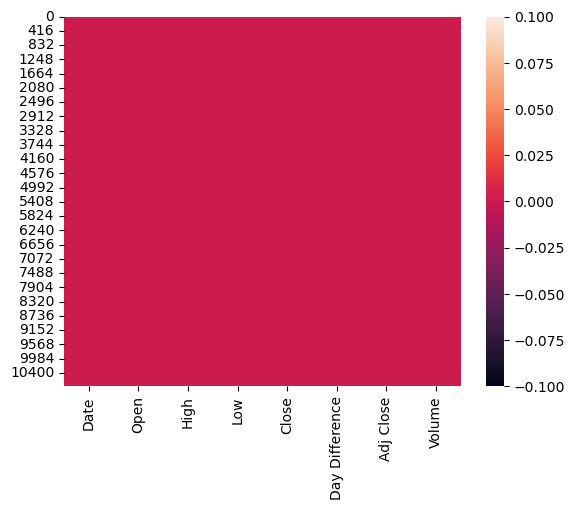

In [5]:
sb.heatmap(df.isnull())

In [6]:
df_obj=df.select_dtypes(object)
df_obj

,Date
0,12-12-1980
1,15-12-1980
2,16-12-1980
3,17-12-1980
4,18-12-1980
...,...
10786,26-09-2023
10787,27-09-2023
10788,28-09-2023
10789,29-09-2023


In [7]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df_obj.columns
for i in df_obj:
    df_obj[i]=Le.fit_transform(df_obj[i])

In [8]:
df_num=df.select_dtypes(['float64','int64'])

In [9]:
df_sum=pd.concat([df_obj,df_num],axis=1)

In [10]:
df_sum

,Date,Open,High,Low,Close,Day Difference,Adj Close,Volume
0,4222,0.128348,0.128906,0.128348,0.128348,0.00000,0.099450,469033600
1,5305,0.122210,0.122210,0.121652,0.121652,-0.00056,0.094261,175884800
2,5662,0.113281,0.113281,0.112723,0.112723,-0.00056,0.087343,105728000
3,6017,0.115513,0.116071,0.115513,0.115513,0.00000,0.089504,86441600
4,6373,0.118862,0.119420,0.118862,0.118862,0.00000,0.092099,73449600
...,...,...,...,...,...,...,...,...
10786,9136,174.820007,175.199997,171.660004,171.960007,-2.86000,171.960007,64588900
10787,9483,172.619995,173.039993,169.050003,170.429993,-2.19000,170.429993,66921800
10788,9835,169.339996,172.029999,167.619995,170.690002,1.35001,170.690002,56294400
10789,10164,172.020004,173.070007,170.339996,171.210007,-0.81000,171.210007,51814200


In [11]:
X=df_sum.drop('Adj Close',axis=1)#input (Date,open,high,low,close,Day difference,volume)
Y=df_sum['Adj Close']  #output Adj Close

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
X_train.shape

(7553, 7)

In [15]:
X_test.shape

(3238, 7)

In [16]:
Y_train.shape

(7553,)

In [17]:
Y_test.shape

(3238,)

In [18]:
#lets give the data to the matchine by overfitting it into same unit
#we use scaling for xtrain and xtest
#scaling we us on input type of data
#it will convert the data into numpy .arraay
from sklearn.preprocessing import StandardScaler

In [19]:
#create an object for the standardScalar
ss=StandardScaler()

In [20]:
#applying scaling on X_train we use fit_transform()
X_train=ss.fit_transform(X_train)  # fit--- train 
#applying scaling on X_test we use transform()
X_test=ss.transform(X_test)

In [21]:
X_train

array([[-0.09926851, -0.46455313, -0.46453416, ..., -0.46459978,
        -0.01886562, -0.59300602],
       [-0.56837408,  0.08604526,  0.0803599 , ...,  0.07690131,
        -0.54399907,  1.06406611],
       [ 1.62377997, -0.46809994, -0.467986  , ..., -0.46803377,
        -0.01223076, -0.65423479],
       ...,
       [-0.42879753, -0.47513814, -0.47498557, ..., -0.47508175,
        -0.01306197, -0.45651554],
       [ 1.49126246, -0.46758566, -0.46695594, ..., -0.46772914,
        -0.02475832,  0.54208117],
       [ 0.18566017, -0.47605257, -0.47594443, ..., -0.4760095 ,
        -0.01389319, -0.84040509]])

In [22]:
X_test

array([[-1.44209121,  0.8069438 ,  0.80299877, ...,  0.81220007,
         0.34234082, -0.55705267],
       [-0.29210876, -0.47468094, -0.47439658, ..., -0.47448636,
        -0.00477953, -0.35431705],
       [-1.39235704, -0.46931915, -0.46916401, ..., -0.46922459,
        -0.01058318, -0.36818869],
       ...,
       [ 0.57519106, -0.46693614, -0.46683539, ..., -0.46703682,
        -0.02217563, -0.35115561],
       [-1.01148953, -0.46909749, -0.46897226, ..., -0.46933538,
        -0.03045807, -0.35528484],
       [ 1.08729262, -0.47156253, -0.47130854, ..., -0.47141571,
        -0.0075255 , -0.20884227]])

In [23]:
#performing the model with linear Regression 
#we have to import Linear Regression from Linear_Model
from sklearn.linear_model import LinearRegression
#create an object for linearRegression
Lr=LinearRegression()
#lets train the model with 70% of data

#we use .fit() method of linearRegression class
Lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
#lets check for slope/gradient  for Tv and radio input
Lr.coef_

array([ 2.46256724e-03, -1.62195542e+05,  6.21866156e+00, -6.46138861e-01,
        1.62323716e+05, -2.71294585e+03, -8.02479970e-02])

In [25]:
#lets check for intercept/Constant
Lr.intercept_

18.534686930239538

In [26]:
#slope:- Changes in Y divided by changes in X (y2-y1 /  x2-x1)

#intercept :- The Best fit line touching a point on y-axis is called an intercept

In [27]:
#lets test the data model with 30% of data
#we will use the inbuilt method : Predict() of LinearRegression
#predict y=mx+c
#predicted output
ypred=Lr.predict(X_test)
ypred

array([50.93959852, -0.37049975, -0.14671075, ..., -0.06796942,
       -0.16269982, -0.26447837])

In [28]:
#lets create  a dictionary for understanding 
dict={"Actual output":Y_test,"Predict output":ypred}
df1=pd.DataFrame(dict)
df1

,Actual output,Predict output
9492,49.625706,50.939599
695,0.110692,-0.370500
1806,0.276376,-0.146711
7600,10.404123,11.607525
2095,0.240822,-0.155526
...,...,...
4327,0.147308,-0.316085
6137,1.320484,0.958196
3123,0.363002,-0.067969
1658,0.271954,-0.162700


In [29]:
#mse #mean square error aslo called as  #loss function #cost function # To check the error 

from sklearn.metrics import mean_squared_error

In [30]:
#NOW we have to check or error in the model  
#checking for mean squared_error
mse=mean_squared_error(Y_test,ypred)
print("mean sqaured error",mse)

mean sqaured error 0.7742428458758173


In [31]:
#check for root of mean square  :--- error minmize error
rmse=np.sqrt(mse)
rmse

0.8799107033533672

In [32]:
#RSS :- Residual sum of Squared(EACH AND EVERY POINT) formula(ytest-ypred)  mse=RSS/N N=no of datapoints
#R2_score =TSS-RSS/TSS   TSS(TOTAL SUM OF SQUARED) ON OUTPUT COLUMN  (OUTPUT OF MEAN) POINTS LAYING ON Y AXIS , MEAN OF Y
# Hortional line parrellel to your input
from sklearn.metrics import r2_score

In [33]:
# R2_score=(TSS-RSS)/TSS
# y_mean:- IT will create a parallel line an according to mean with respect to your  input
# TSS is always greater then RSS TSS>RSS
# Assurity: 0.9 and above, but if is not 0.9 and greater then it might underfit or overfit 
# Range of R2_score :0 to 1 +1 
# thresshold value =0.5  greater than 0.5 model is good . 
# LEsser than 0.5 not good

# eg TSS=80 ,RSs=60
# Rscore=(80-60)/80
#       =20/80
# Rscore=0.25 =25%
print("r2_score is ",r2_score(Y_test,ypred))

r2_score is  0.999505004836729


In [34]:
#checking for training score for regualarisation purpose
Lr.score(X_train,Y_train)

0.9995367934693639

In [35]:
#checking for testing score for regualarisation purpose
Lr.score(X_test,Y_test)

0.999505004836729

In [36]:
#asummption 
# 1] Input and output are in linear Regression (upward or downward)
# 2] If relation is linear then data point should be homoskedastik(closed datapoints), 
#      but it should not be hetroskedastik(far datapoints)
# 3]  but it should not be multicolinearity (input input not relation)
# 4] it should make normal distributed curve on both the sides,skewness:(to find the closeness):it should be close to zero or zero


In [37]:
#score is 92% it excellent but....
#checking for assumption 1: There should be linear Relation between input and output  
residual_error=Y_test-ypred
residual_error

9492   -1.313893
695     0.481192
1806    0.423087
7600   -1.203402
2095    0.396348
          ...   
4327    0.463393
6137    0.362288
3123    0.430971
1658    0.434654
5500    0.490773
Name: Adj Close, Length: 3238, dtype: float64

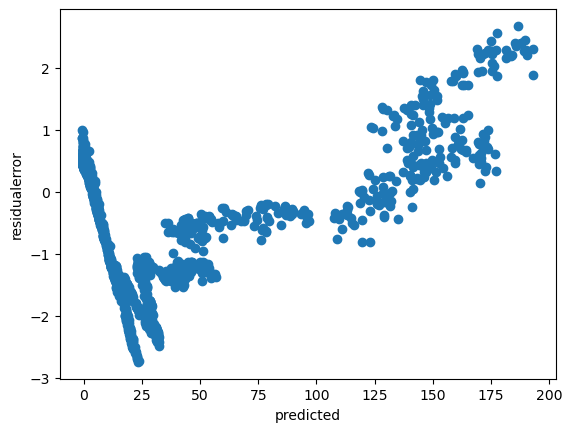

In [38]:
#visualising the data points into scatterplot betweeen input y_pred and output output residual error
plt.scatter(ypred,residual_error)
# sb.scatterplot(y_pred,residual_error)
# plt.plot(ypred,residual_error,color='red')
plt.xlabel("predicted")
plt.ylabel("residualerror")
plt.show()

In [39]:
#IN the above plot there is  relation between :input and output
#as graph is move in the upward direction 
#there is relation between input((Date,open,high,low,close,Day difference,volume)) and output(Adj Close) means it is linear 
#first assumption is fulfullid or first assumption is pass

In [40]:
#2nd assumption :It realtion is linear ,Then we have to check for wether the data points are homeskedastik 
#but it hould not be heterostkedastik
#If we pass  to fulfilled first assumption then the second assumption will automatically pass  beacause there is relation 
# between input and output

In [41]:
#3 assumption which is based on concept of multicolinear in input and input show no relation  ,but all input column are 
#essential for prediction

<Axes: >

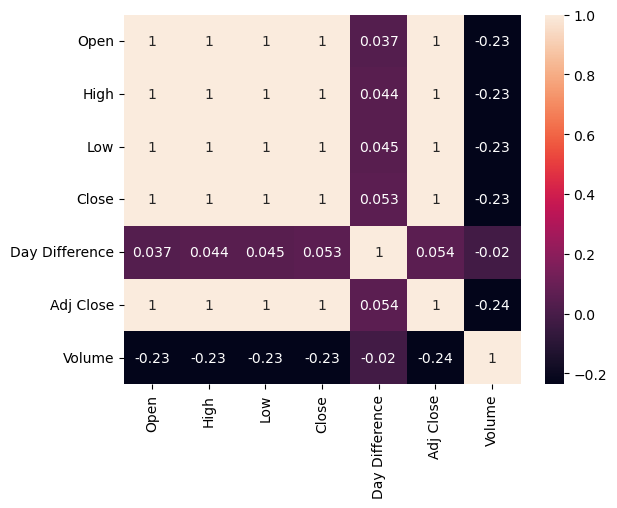

In [42]:
sb.heatmap(df.corr(),annot=True)

<Axes: xlabel='Adj Close', ylabel='Count'>

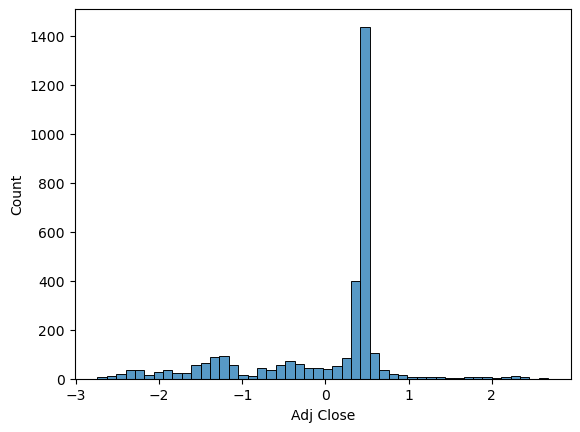

In [43]:
#4 assumption :residudal error should be normally distributed
#it means that  data should be equally distributed on both the the sides.
#it means that skewnes should be close to zero or zero
sb.histplot(residual_error)

<Axes: xlabel='Adj Close', ylabel='Density'>

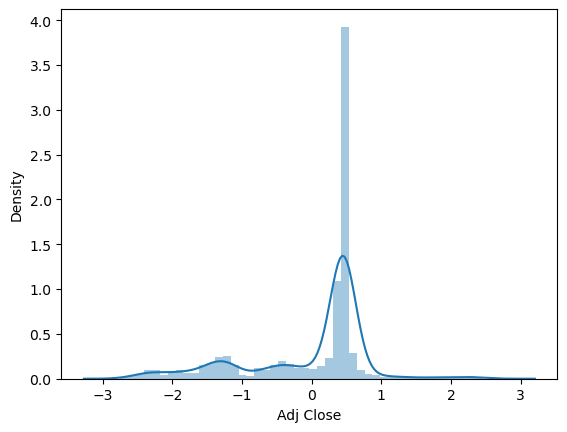

In [44]:
sb.distplot(residual_error)

<Axes: xlabel='Adj Close', ylabel='Density'>

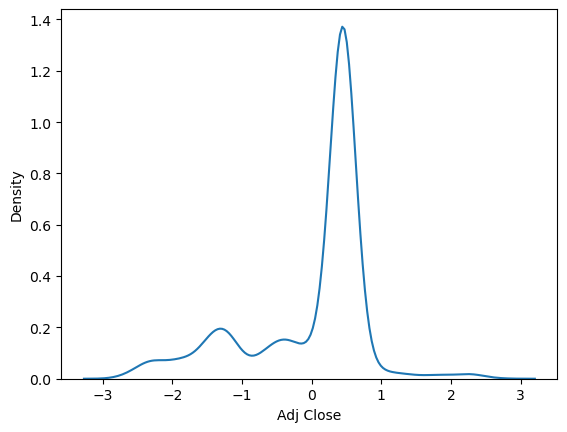

In [45]:
sb.distplot(residual_error,hist=False) #skew left

In [46]:
residual_error.skew() #skewness should be close to 0 but it is not full filled
#but all three assumption is fullfilled out of four
#hence we say that model is ready to deploy 

-1.0649491820284969

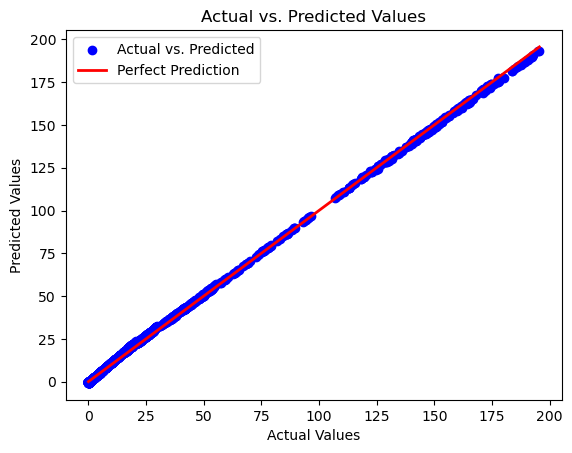

In [47]:
plt.scatter(Y_test, ypred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# # Add a diagonal line for reference (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()


# OPTIONAL :-Polynomial Linear Regression  (with help of that we can reduce the skewnesss) of it 

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
pl=PolynomialFeatures(3)  #we will increase the degree on input(X) X=2 it is quadratic equation  #create an object  for Polynomial Features

In [50]:
X_poly=pl.fit_transform(X)

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [52]:
X_train.shape

(7553, 120)

In [53]:
X_test.shape

(3238, 120)

In [54]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [55]:
X_train

array([[ 0.        , -0.09926851, -0.46455313, ..., -0.14971241,
         0.02256878, -0.06241824],
       [ 0.        , -0.56837408,  0.08604526, ...,  0.06949895,
        -1.60140818,  0.00493364],
       [ 0.        ,  1.62377997, -0.46809994, ..., -0.14971546,
         0.02313592, -0.06257519],
       ...,
       [ 0.        , -0.42879753, -0.47513814, ..., -0.14971564,
         0.02318021, -0.06181424],
       [ 0.        ,  1.49126246, -0.46758566, ..., -0.14964763,
         0.00480601, -0.03535499],
       [ 0.        ,  0.18566017, -0.47605257, ..., -0.14971577,
         0.02303083, -0.06276689]])

In [56]:
X_test

array([[ 0.        , -1.44209121,  0.8069438 , ..., -0.13070302,
         0.06329655, -0.06229612],
       [ 0.        , -0.29210876, -0.47468094, ..., -0.14969678,
         0.02542998, -0.06107094],
       [ 0.        , -1.39235704, -0.46931915, ..., -0.14971332,
         0.02386157, -0.06118876],
       ...,
       [ 0.        ,  0.57519106, -0.46693614, ..., -0.1497    ,
         0.02082699, -0.0610433 ],
       [ 0.        , -1.01148953, -0.46909749, ..., -0.14965313,
         0.01868451, -0.06107934],
       [ 0.        ,  1.08729262, -0.47156253, ..., -0.1497042 ,
         0.025639  , -0.05946701]])

In [57]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [58]:
Lr.coef_

array([ 8.06355428e+03,  2.99860506e-02, -4.56788844e+04,  3.50073896e+01,
       -5.07543060e+01,  4.57598311e+04, -7.64103497e+02,  9.72303857e-02,
       -3.15569169e-02, -1.02793440e+05, -8.52837649e-02,  2.90470575e+01,
        1.02931936e+05, -1.70593822e+03, -5.94881206e-02,  5.04518330e+10,
       -2.66066545e+08,  1.74329263e+08, -1.00844790e+11,  1.56704913e+09,
        3.02432466e+04, -3.75177789e+01,  1.24976172e+03,  2.66198494e+08,
       -4.15904712e+06,  2.14309197e+01, -1.99472892e+03, -1.74420127e+08,
        2.68987258e+06, -2.88454777e+00,  5.04160157e+10, -1.56602575e+09,
       -3.02278699e+04,  2.24518585e+07,  7.73651091e+02, -1.06116150e-01,
        5.14754881e-03,  6.66776255e+04,  1.96417088e+00, -1.43220956e+01,
       -6.68012095e+04,  1.09811790e+03,  3.49980710e-02,  4.51723306e+10,
        1.98117810e+08, -1.12258477e+08, -9.05793250e+10,  1.40553169e+09,
       -1.38629335e+04,  3.94313047e+01,  6.81151446e+02, -1.98486921e+08,
        3.10770251e+06,  

In [59]:
Lr.intercept_

18.534436580031798

In [60]:
ypred=Lr.predict(X_test)
ypred

array([49.30920827,  0.08564508,  0.26711023, ...,  0.35048043,
        0.27710092,  0.1931585 ])

In [61]:
dict1={"Acutal op":Y_test,"PRedict op":ypred}
df2=pd.DataFrame(dict1)
df2

,Acutal op,PRedict op
9492,49.625706,49.309208
695,0.110692,0.085645
1806,0.276376,0.267110
7600,10.404123,10.627015
2095,0.240822,0.213010
...,...,...
4327,0.147308,0.097665
6137,1.320484,1.337564
3123,0.363002,0.350480
1658,0.271954,0.277101


In [62]:
mse=mean_squared_error(Y_test,ypred)
mse

0.09936547838652375

In [63]:
rmse=np.sqrt(mse)
rmse

0.31522290269985737

In [64]:
print("r2score",r2_score(Y_test,ypred))

r2score 0.9999364728631858


In [65]:
residual_error=Y_test-ypred
residual_error

9492    0.316498
695     0.025047
1806    0.009266
7600   -0.222892
2095    0.027812
          ...   
4327    0.049643
6137   -0.017080
3123    0.012522
1658   -0.005147
5500    0.033136
Name: Adj Close, Length: 3238, dtype: float64

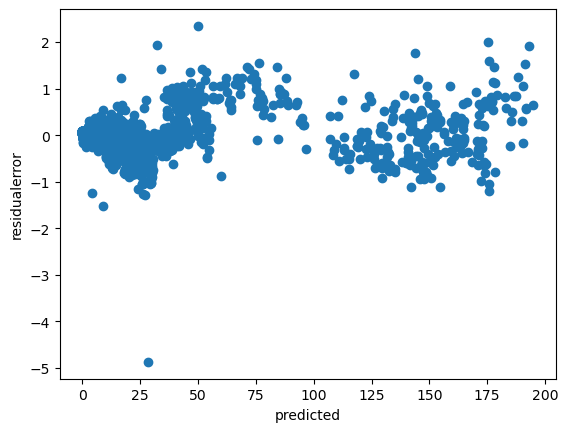

In [66]:
plt.scatter(ypred,residual_error)
plt.xlabel("predicted")
plt.ylabel("residualerror")
plt.show()

<Axes: xlabel='Adj Close', ylabel='Count'>

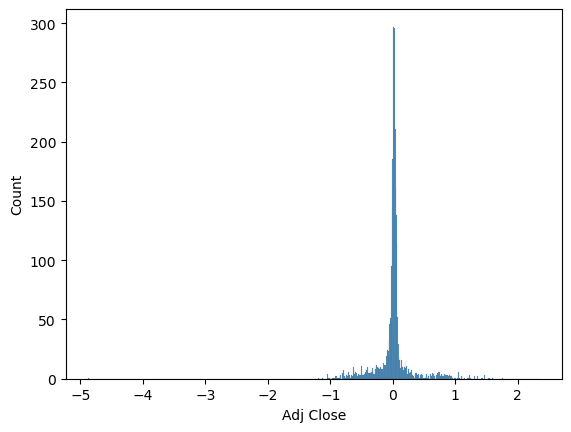

In [67]:
sb.histplot(residual_error)

<Axes: xlabel='Adj Close', ylabel='Density'>

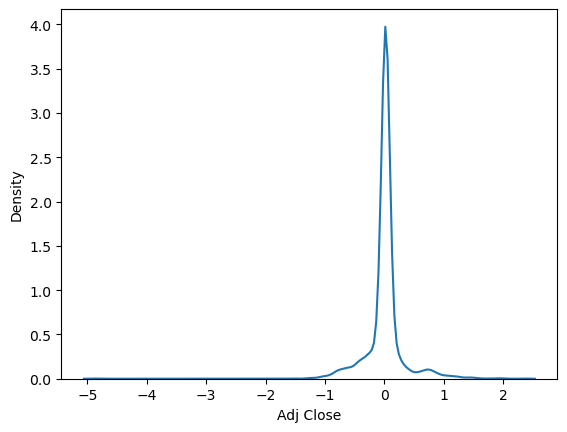

In [68]:
sb.distplot(residual_error,hist=False)

<Axes: xlabel='Adj Close', ylabel='Density'>

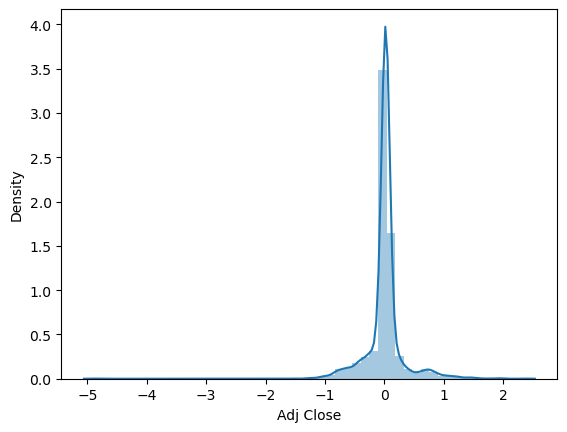

In [69]:
sb.distplot(residual_error,hist=True)

In [70]:
residual_error.skew()  #residual skewness has close to zero but not perfectly zero 

-0.3692508127199864

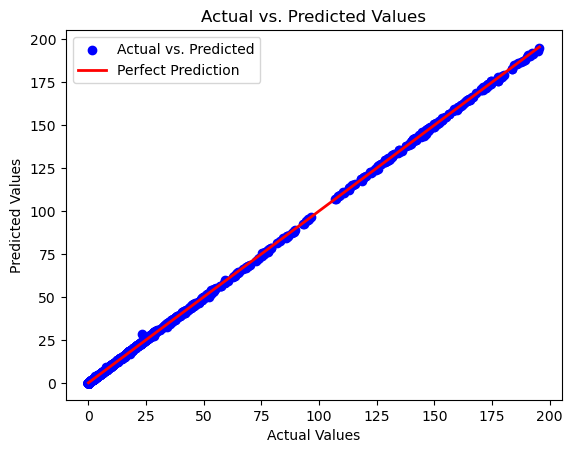

In [71]:
plt.scatter(Y_test, ypred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# # Add a diagonal line for reference (y = x)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()
